In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Ejercicio 1**

Genere una señal $s(t) = \sin(2\pi f_1 t) + 4 \sin(2\pi f_2 t)$, con $f_1 = 10$ Hz y $f_2 = 20$ Hz, y obtenga su versión discreta $s[n]$ con período de muestreo $T = 0{,}001$ s en el intervalo de tiempo $t = [0, 1)$ s. A continuación:

1. Calcule la TDF $S[k]$ de la señal $s[n]$ y grafique el espectro de magnitud de $S[k]$.

2. Verifique la relación de Parseval para la TDF:

$$
E_s = \sum_{n=0}^{N-1} s[n]^2 = \frac{1}{N} \sum_{k=0}^{N-1} |S[k]|^2,
$$

donde $N$ es la cantidad de muestras de $s[n]$.

**Solución ejercicio 1**
Para la TDF se utiliza la ecuación:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{\frac{-2j\pi kn}{N}}
$$

$X[k]$ es de longitud N, donde cada valor representa cuanta energía (magintud) hay en cierta frecuencia, pero los indices k por si solo no significan nada, para esto, se calcula a que frecuencia real en Hz corresponde cada índice k con *eje_frecuencias*. Tambíen por su simetría podría graficarse unicamente la parte positiva.

pARA *EJE_FRECUENCIAS* se condiera la resolución espectral dada por $$\delta f= \frac{f_s}{N} $$ 


Para $k=0$ hasta $N/2−1$, los valores corresponden a frecuencias positivas:
    $$f_k=\frac{k \dot f_s}{N} $$
   
Para k=N/2 hasta N−1, los valores representan las frecuencias negativas (por simetría del espectro):
    $$fk=\frac{(k-N) \dot f_s}{N}$$
    

In [25]:


def tdf(x):
    N = len(x)
    X = []
    for k in range(N):
        suma = 0
        for n in range(N):
            suma += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(suma)
    return np.array(X)

def eje_frecuencias(N, fs):
    f = []
    for k in range(N):
        if k < N // 2:
            f_k = k * fs / N
        else:
            f_k = (k - N) * fs / N 
        f.append(f_k)
    return np.array(f)

def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal_uno,frecuencia_senoidal_dos, frecuencia_muestreo,  offset=0):
    Ts = 1 / frecuencia_muestreo 
    tiempo = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = np.sin(2 * np.pi * frecuencia_senoidal_uno * tiempo ) + 4*np.sin(2 * np.pi * frecuencia_senoidal_dos * tiempo )  + offset
    return tiempo, y


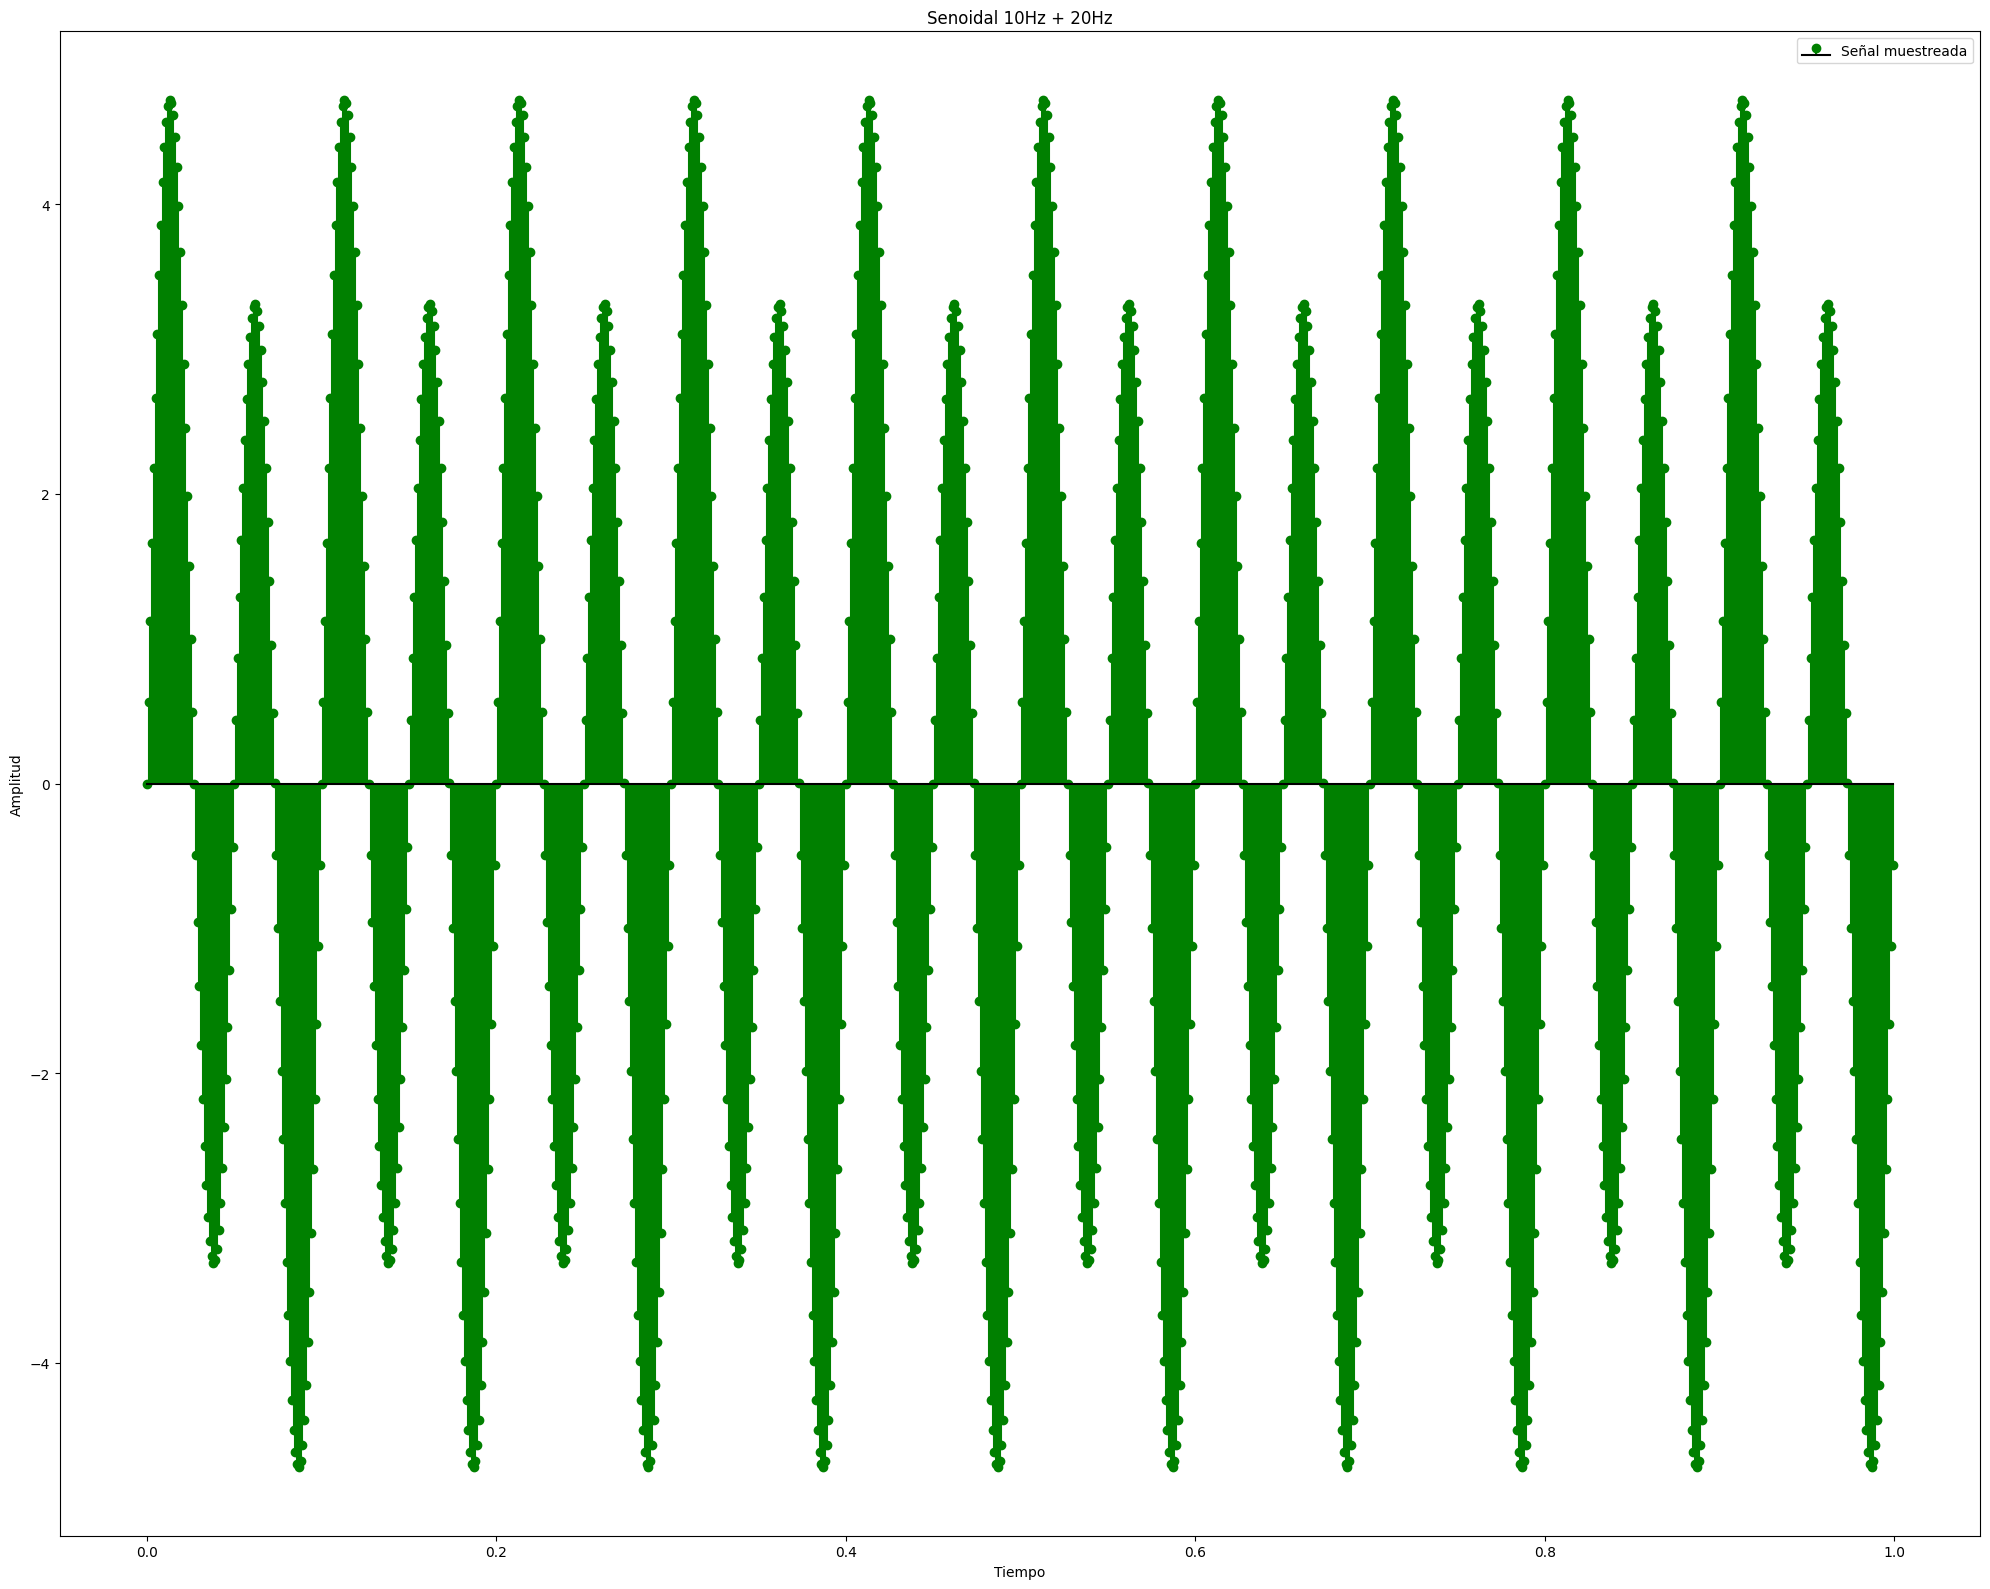

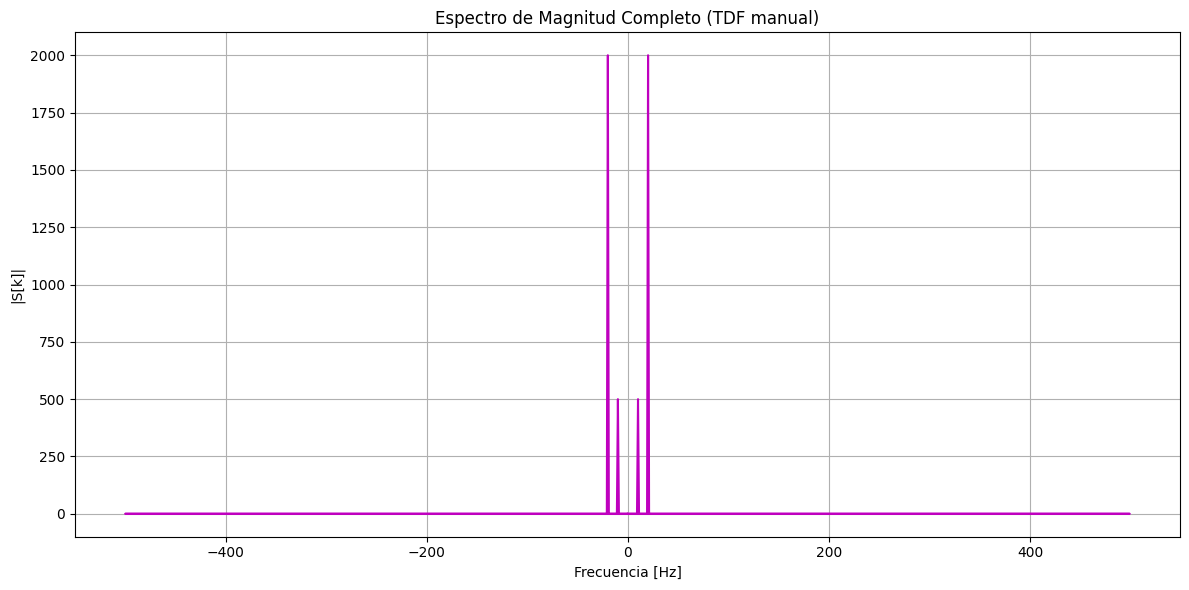

           Energía en tiempo  Energía en frecuencia
Resultado             8500.0                 8500.0


In [26]:
t, y = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal_uno=10, frecuencia_senoidal_dos=20,frecuencia_muestreo=1000)


plt.figure(figsize=(20, 16))
plt.subplot(1, 1, 1)
plt.stem(t, y, linefmt='g-', markerfmt='go', basefmt='k-', label='Señal muestreada')
plt.legend()
plt.title("Senoidal 10Hz + 20Hz")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

X = tdf(y)
N = len(X)

frecuencias = eje_frecuencias(N, fs=1000)

plt.figure(figsize=(12, 6))
plt.plot(frecuencias, np.abs(X), 'm')
plt.title("Espectro de Magnitud Completo (TDF manual)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|S[k]|")
plt.grid(True)
plt.tight_layout()
plt.show()

# Verificar la relación de Parseval
energia_tiempo = np.sum(x ** 2)
energia_frecuencia = (1 / N) * np.sum(np.abs(X) ** 2)


datos = [[energia_tiempo, energia_frecuencia]]
columnas = [
    "Energía en tiempo",
    "Energía en frecuencia",
]
nombres = ["Resultado"]

tabla = pd.DataFrame(datos, columns=columnas, index=nombres)
tabla = tabla.round(4)

print(tabla)

Realice los siguientes cambios y analice los resultados obtenidos:
1. Modifique s[n] de forma tal que:
s[n] = sin(2πf1t) + 4 sin(2πf2t) + 4
y analice los cambios en el espectro de magnitud de S[k].
2. Modifique las frecuencias de las se ̃nales seno de forma tal que f1 = 10 Hz y
f2 = 11 Hz y analice los cambios en el espectro de magnitud de S[k].
3. Modifique nuevamente las frecuencias de las se ̃nales seno de forma tal que
f1 = 10 Hz y f2 = 10,5 Hz. ¿Qu ́e ocurre en el espectro de magnitud de S[k]?
4. Modifique el intervalo de tiempo de an ́alisis de la siguiente manera t =
[0 ...2) seg. y analice los cambios en la TDF.

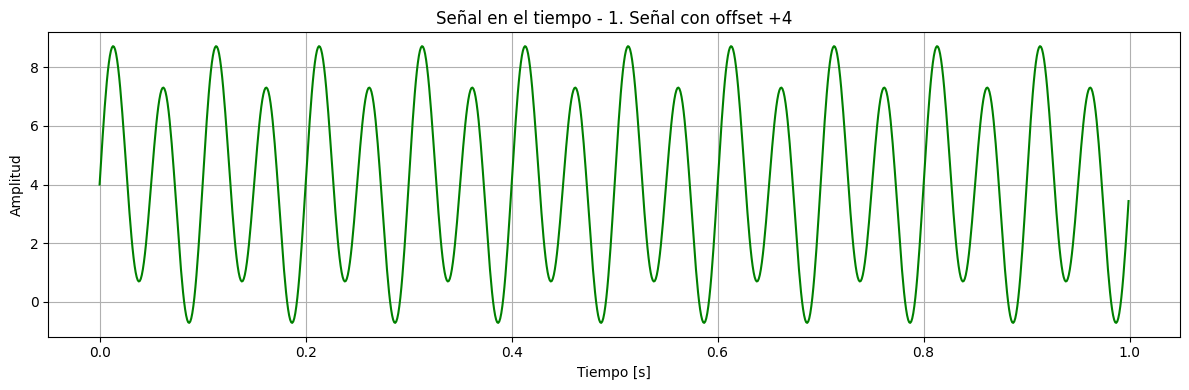

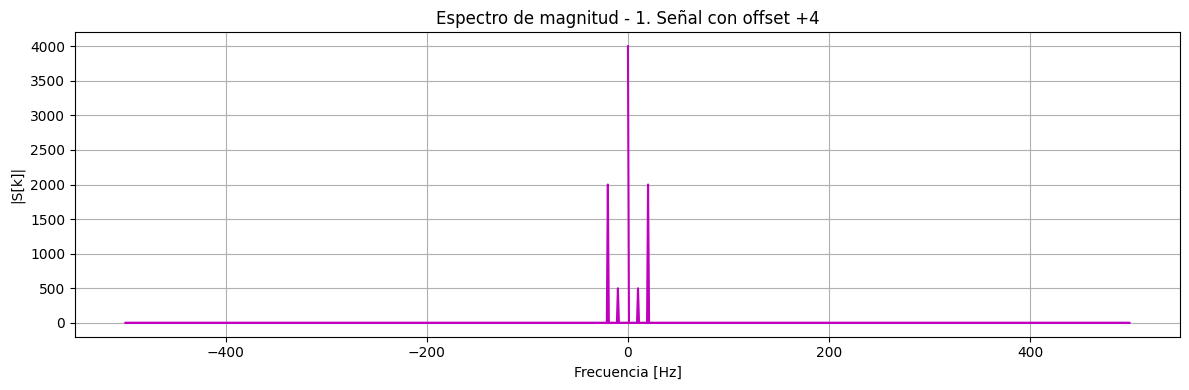

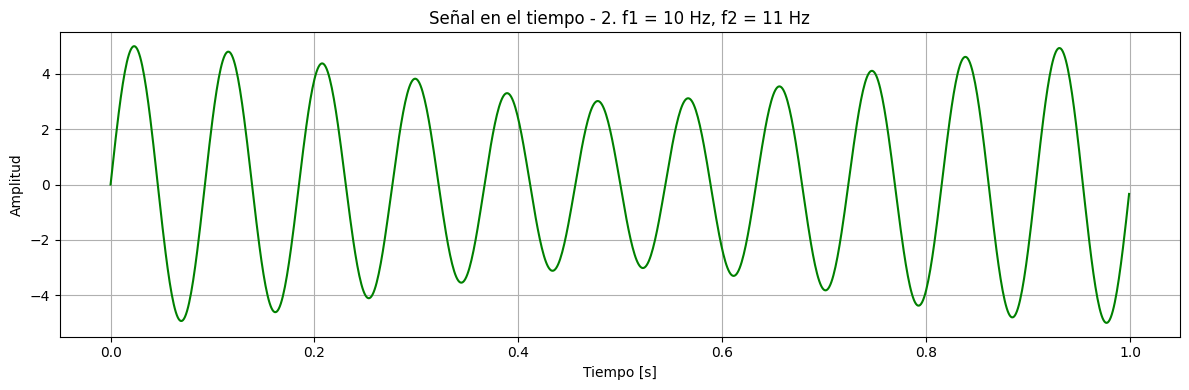

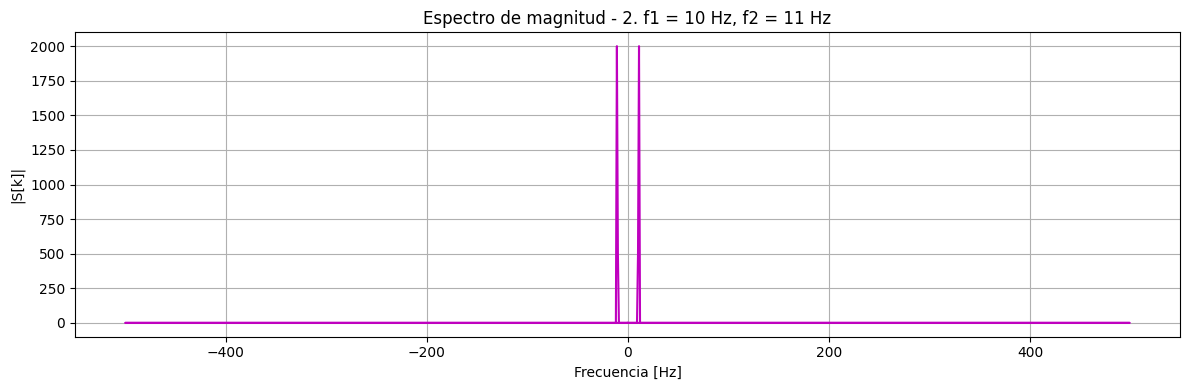

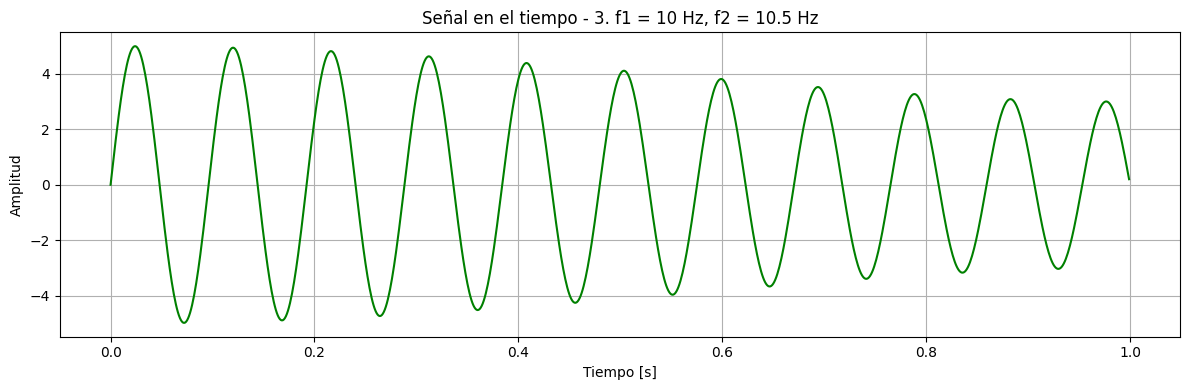

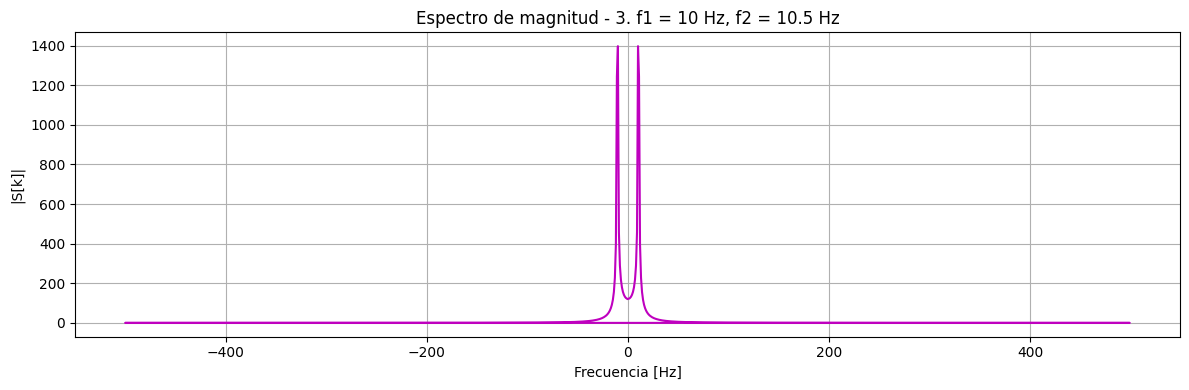

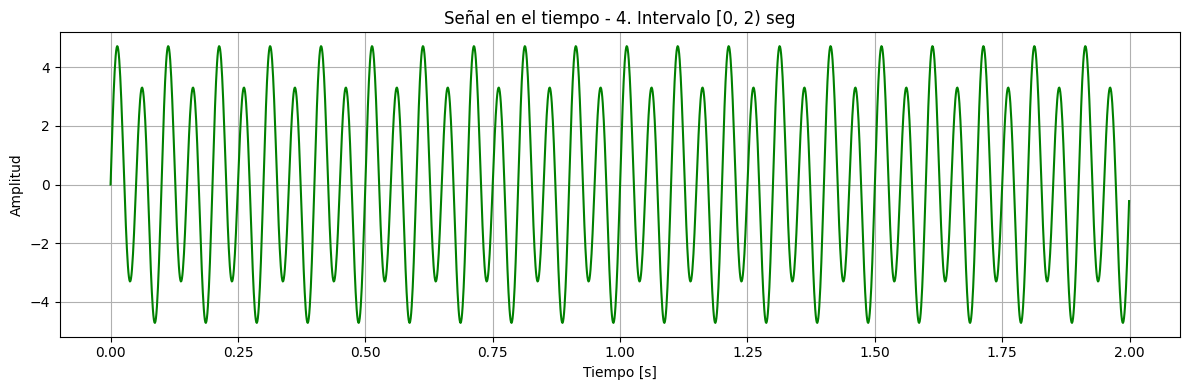

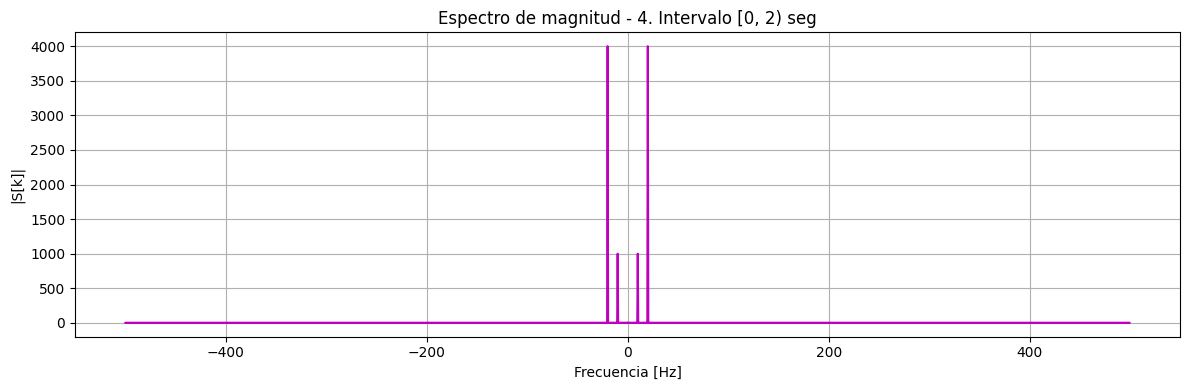

Comparación de Energías - Relación de Parseval:
                             Energía en tiempo  Energía en frecuencia
1. Señal con offset +4                 24500.0                24500.0
2. f1 = 10 Hz, f2 = 11 Hz               8500.0                 8500.0
3. f1 = 10 Hz, f2 = 10.5 Hz             8500.0                 8500.0
4. Intervalo [0, 2) seg                17000.0                17000.0


In [29]:
def analizar(y, t, fs, titulo):
    N = len(y)
    X = tdf(y)
    f = eje_frecuencias(N, fs)

    # Gráfico señal en el tiempo
    plt.figure(figsize=(12, 4))
    plt.plot(t, y, 'g')
    plt.title(f"Señal en el tiempo - {titulo}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico espectro de magnitud
    plt.figure(figsize=(12, 4))
    plt.plot(f, np.abs(X), 'm')
    plt.title(f"Espectro de magnitud - {titulo}")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|S[k]|")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Parseval
    energia_tiempo = np.sum(y ** 2)
    energia_frecuencia = (1 / N) * np.sum(np.abs(X) ** 2)

    tabla = pd.DataFrame(
        [[energia_tiempo, energia_frecuencia]],
        columns=["Energía en tiempo", "Energía en frecuencia"],
        index=[titulo]
    )
    return tabla.round(4)

# -------------------- Parámetros comunes --------------------
fs = 1000

# -------------------- Casos solicitados --------------------

# 1. Agregar offset +4
t1, y1 = senoidal(0, 1, 10, 20, fs, offset=4)
tabla1 = analizar(y1, t1, fs, "1. Señal con offset +4")

# 2. f1 = 10 Hz, f2 = 11 Hz
t2, y2 = senoidal(0, 1, 10, 11, fs)
tabla2 = analizar(y2, t2, fs, "2. f1 = 10 Hz, f2 = 11 Hz")

# 3. f1 = 10 Hz, f2 = 10.5 Hz
t3, y3 = senoidal(0, 1, 10, 10.5, fs)
tabla3 = analizar(y3, t3, fs, "3. f1 = 10 Hz, f2 = 10.5 Hz")

# 4. Intervalo de tiempo [0, 2)
t4, y4 = senoidal(0, 2, 10, 20, fs)
tabla4 = analizar(y4, t4, fs, "4. Intervalo [0, 2) seg")

# -------------------- Mostrar resumen de energías --------------------
tabla_final = pd.concat([tabla1, tabla2, tabla3, tabla4])
print("Comparación de Energías - Relación de Parseval:")
print(tabla_final)